In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#sns.set(font='SimHei')

In [31]:
iris_data = datasets.load_iris()
X = iris_data.data[:, [2, 3]]
y = iris_data.target
label_list = ['山鸢尾', '杂色鸢尾', '维吉尼亚鸢尾']

In [32]:
def plot_decision_regions(X, y, classifier=None):
    marker_list = ['o', 'x', 's']
    color_list = ['r', 'b', 'g']
    cmap = ListedColormap(color_list[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    t1 = np.linspace(x1_min, x1_max, 666)
    t2 = np.linspace(x2_min, x2_max, 666)

    x1, x2 = np.meshgrid(t1, t2)
    y_hat = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
    y_hat = y_hat.reshape(x1.shape)
    plt.contourf(x1, x2, y_hat, alpha=0.2, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    for ind, clas in enumerate(np.unique(y)):
        plt.scatter(X[y == clas, 0], X[y == clas, 1], alpha=0.8, s=50,
                    c=color_list[ind], marker=marker_list[ind], label=label_list[clas])

In [33]:
clfLR = LogisticRegression(random_state=0,solver='lbfgs')
clfLR.fit(X,y)
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='warn', n_jobs=None, penalty='l2',
#                    random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
#                    warm_start=False)

LogisticRegression(random_state=0)

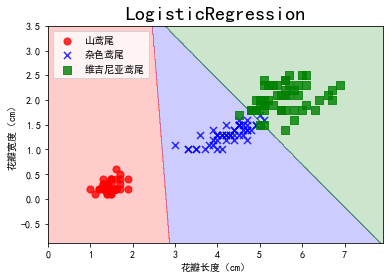

In [34]:
plot_decision_regions(X, y, classifier=clfLR)
plt.xlabel('花瓣长度（cm）')
plt.ylabel('花瓣宽度（cm）')
plt.title('LogisticRegression', fontsize=20)
plt.legend()
plt.savefig('LR.jpg')
plt.show()

In [35]:
# rbf为高斯核
svm = SVC(kernel='rbf', gamma=1, C=1, random_state=1)
svm.fit(X, y)
# SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
#   max_iter=-1, probability=False, random_state=1, shrinking=True,
#   tol=0.001, verbose=False)


SVC(C=1, gamma=1, random_state=1)

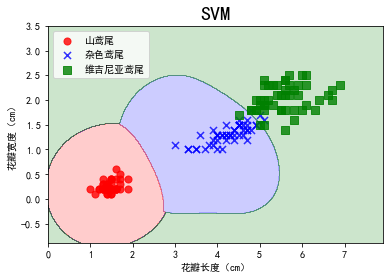

In [36]:
plot_decision_regions(X, y, classifier=svm)
plt.xlabel('花瓣长度（cm）')
plt.ylabel('花瓣宽度（cm）')
plt.title('SVM', fontsize=20)
plt.legend()
plt.savefig('SVM.jpg')
plt.show()

In [37]:
clfTree = DecisionTreeClassifier()
clfTree.fit(X, y)

DecisionTreeClassifier()

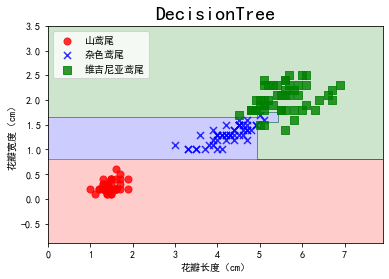

In [38]:
plot_decision_regions(X, y, classifier=clfTree)
plt.xlabel('花瓣长度（cm）')
plt.ylabel('花瓣宽度（cm）')
plt.title('DecisionTree', fontsize=20)
plt.legend()
plt.savefig('TREE.jpg')
plt.show()

In [40]:
clfGNB = GaussianNB()
clfGNB.fit(X, y)

GaussianNB()

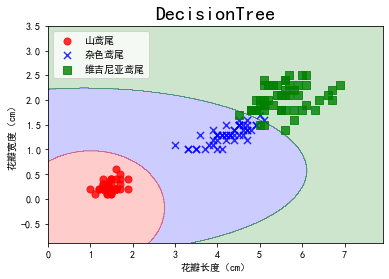

In [41]:
plot_decision_regions(X, y, classifier=clfGNB)
plt.xlabel('花瓣长度（cm）')
plt.ylabel('花瓣宽度（cm）')
plt.title('DecisionTree', fontsize=20)
plt.legend()
plt.savefig('GaussianNB.jpg')
plt.show()

In [42]:
clfKM = KMeans()
clfKM.fit(X,y)

KMeans()

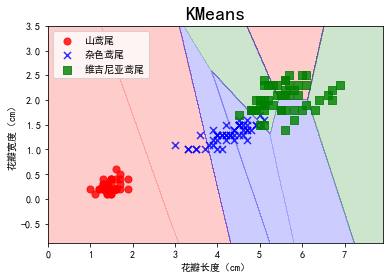

In [43]:
plot_decision_regions(X, y, classifier=clfKM)
plt.xlabel('花瓣长度（cm）')
plt.ylabel('花瓣宽度（cm）')
plt.title('KMeans', fontsize=20)
plt.legend()
plt.savefig('KMeans.jpg')
plt.show()